Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Training data shape: (455, 30), Testing data shape: (114, 30)
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0

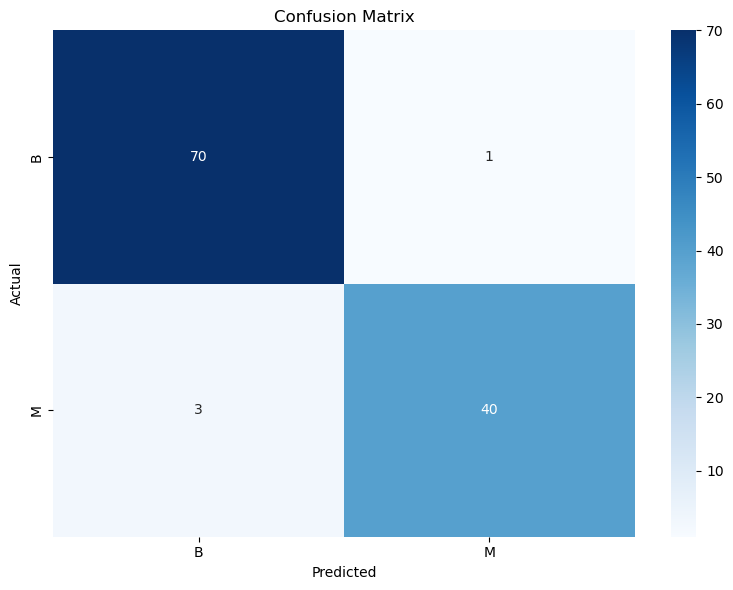

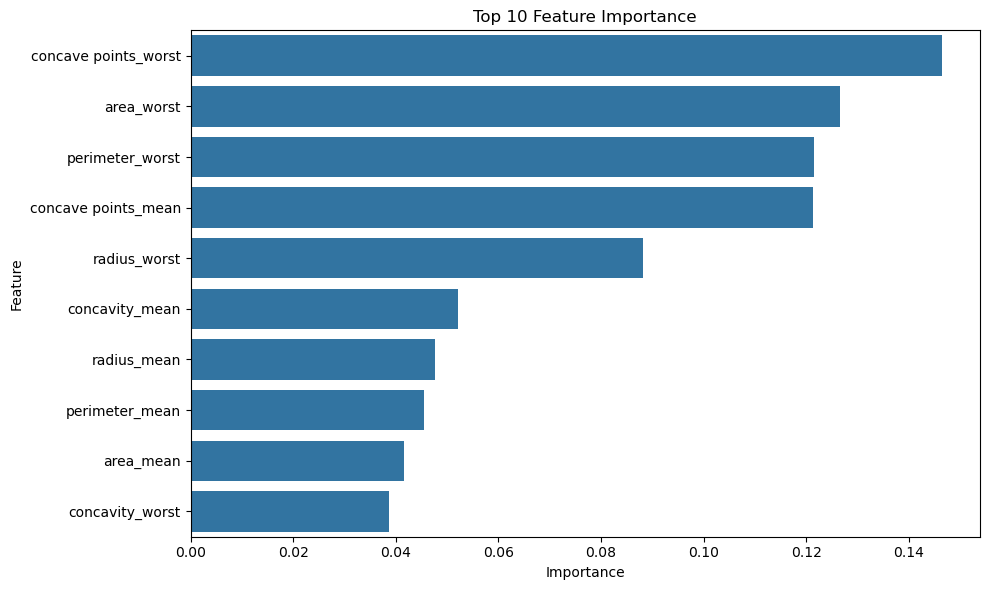

Cross-validation scores: [0.92105263 0.94736842 0.98245614 0.97368421 0.98230088]
Mean CV score: 0.9614
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Classification completed.
Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 15, 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("./Documents/breast-cancer.csv")

# Check available columns
print(df.columns)

# Encode the target variable if it doesn't exist
if 'diagnosis_encoded' not in df.columns:
    df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Assuming df is your DataFrame
X = df.drop(['id', 'diagnosis', 'diagnosis_encoded'], axis=1, errors='ignore')
y = df['diagnosis_encoded']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")



rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_depth=15, random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\
Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['B', 'M'], 
            yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"\
Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Classification completed.")

                                          #HYPER PARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [5, 7, 10, 15],  
    'min_samples_split': [2, 4, 6, 8],  
    'min_samples_leaf': [1, 2, 3, 4],  
    'class_weight': ['balanced', None]  
}

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for faster tuning
grid_search = RandomizedSearchCV(
    rf_model, param_grid, 
    n_iter=15,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Prioritizing recall to catch more malignant cases
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_tuned = best_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

Training data shape: (455, 30), Testing data shape: (114, 30)
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



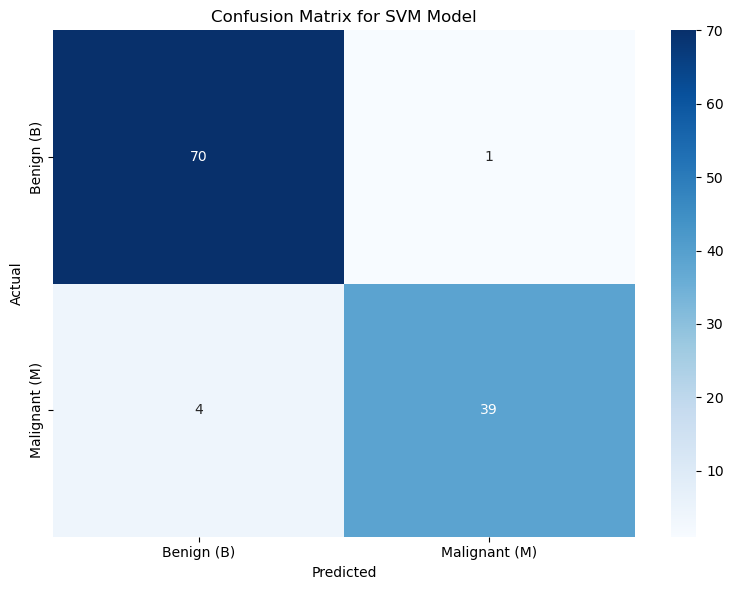

SVM Model Cross-Validation Scores: [0.96703297 0.98901099 0.94505495 0.96703297 0.94505495]
Mean SVM CV Accuracy: 0.9626


In [15]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Documents\breast-cancer.csv")


# Encode the target variable if it doesn't exist
if 'diagnosis_encoded' not in df.columns:
    df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Prepare features (X) and target (y)
X = df.drop(['id', 'diagnosis', 'diagnosis_encoded'], axis=1, errors='ignore')
y = df['diagnosis_encoded']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

# Create SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (B)', 'Malignant (M)'], 
            yticklabels=['Benign (B)', 'Malignant (M)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.tight_layout()
plt.show()

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\Documents\breast-cancer.csv")


# Encode the target variable
df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Prepare features (X) and target (y)
X = df.drop(['id', 'diagnosis', 'diagnosis_encoded'], axis=1, errors='ignore')
y = df['diagnosis_encoded']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SVM Model ---
svm_model = SVC(kernel='linear', random_state=42)

# Perform cross-validation for SVM model
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"SVM Model Cross-Validation Scores: {svm_cv_scores}")
print(f"Mean SVM CV Accuracy: {svm_cv_scores.mean():.4f}")





Test Accuracy:
0.956140350877193
Confusion Matrix:
[[71  1]
 [ 4 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



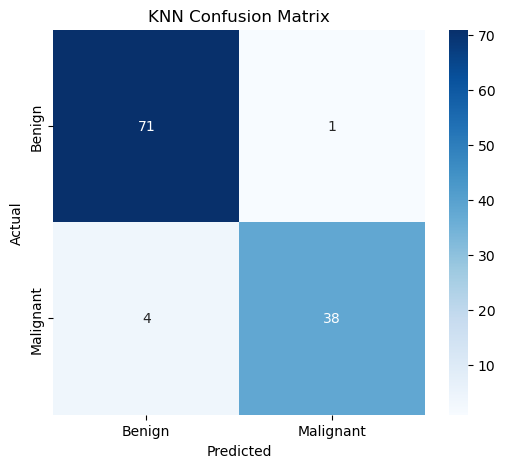

KNN modeling complete.


In [11]:
# K Nearest Neighbors Modeling on the Breast Cancer Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("./Documents/breast-cancer.csv")

df['diagnosis_numeric'] = df['diagnosis'].map({'B': 0, 'M': 1})


# Prepare data: drop unnecessary columns (id, diagnosis) and use diagnosis_numeric as target
X = df.drop(['id', 'diagnosis', 'diagnosis_numeric'], axis=1)
y = df['diagnosis_numeric']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setup KNN Classifier with a default k=5 (neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Test Accuracy:')
print(accuracy)
print('\
Confusion Matrix:')
print(cm)
print('\
Classification Report:')
print(report)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

print('KNN modeling complete.')